**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
anger_train.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [5]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)


In [7]:
train_df.head()

,id,text,emotion,intensity
2313,30309,Finn singing 'Can't Fight This Feeling' in the...,joy,0.560
1531,20674,@BlairWitchMovie love new movie\n #BlairWitch ...,fear,0.438
17,10017,"I hate my lawn mower. If it had a soul, I'd co...",anger,0.833
565,10565,@SlaveGuinevere its more of a little prick tha...,anger,0.417
67,10067,Once again the only thing on my feed is naay r...,anger,0.750


In [8]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [9]:
# Answer here
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

top_n=30

#transform 
count_vect = CountVectorizer(stop_words='english')
train_fit_trans = count_vect.fit_transform(train_df['text'])

terms = count_vect.get_feature_names_out() 
freqs = np.asarray(train_fit_trans.sum(axis=0))[0]

df_freq = pd.DataFrame({'term': terms, 'frequency': freqs})
df_freq = df_freq.sort_values(by='frequency', ascending=False).head(top_n)

fig = px.bar(df_freq, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Blues",  # sequential 漸層色
             title=f"Top {top_n} words (Train dataset)")

fig.update_layout(xaxis_tickangle=-90)  # 把 x 軸標籤轉直
fig.show()

In [10]:
# Answer here
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

top_n=30

#transform to TDM
count_vect = CountVectorizer(stop_words='english')
test_fit_trans = count_vect.fit_transform(test_df['text'])

terms = count_vect.get_feature_names_out() 
freqs = np.asarray(test_fit_trans.sum(axis=0))[0]

df_freq = pd.DataFrame({'term': terms, 'frequency': freqs})
df_freq = df_freq.sort_values(by='frequency', ascending=False).head(top_n)

fig = px.bar(df_freq, 
             x="term", 
             y="frequency", 
             color="frequency", 
             color_continuous_scale="Reds",  # sequential 漸層色
             title=f"Top {top_n} words (Test dataset)")

fig.update_layout(xaxis_tickangle=-90)  # 把 x 軸標籤轉直
fig.show()

---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [11]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [12]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [13]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

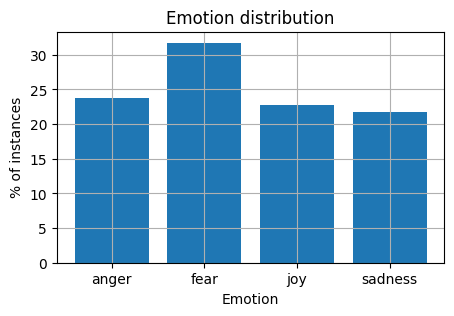

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [17]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [18]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [19]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [20]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
# check the dimension
train_data_BOW_features.shape
# ( num(articles), num(vocabulary) )

(3613, 10115)

In [22]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [23]:
"😂" in feature_names
# 預設的 CountVectorizer 只會處理英文字母、數字組成的詞；
# emoji、標點符號、中文等都會被過濾掉。

False

Let's try using another tokenizer below.

In [24]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/Users/linhsinyu/Desktop/Data Mining/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [25]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [26]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [27]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [28]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_1000 = TfidfVectorizer(max_features=1000, 
                             #stop_words='english', 
                             ngram_range=(1,2), # unigram + bigram，短文本常常有幫助
                             max_df=0.9,        # 太常見的詞過濾（>90% 文件出現）
                             min_df=3           # 太稀有的詞過濾（<3 文件出現） 
                             )
X_tfidf = tfidf_1000.fit_transform(train_df['text'])

feature_names = tfidf_1000.get_feature_names_out()
feature_names[100:110]

array(['black', 'blame', 'blessed', 'blood', 'blues', 'boiling', 'book',
       'both', 'boy', 'break'], dtype=object)

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape) # 有 3613 篇文章，每篇文章轉成一個 500 維向量（每一維代表一個字詞）
print('y_train.shape: ', y_train.shape) # 對應每篇文章的 情緒標籤（例如 “joy”、“sadness”、“anger”）
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

"""
•	一篇文章 → 一個 row（長度 500 的特徵向量） 每個詞在該文件中出現的次數 
    e.g.  happy, sad, love, fear, cry
         [  1,    3,    0,    2,...]
•	一個標籤 → y_train 中的單一值   
    e.g. ['joy', 'sadness', 'anger', 'joy', 'fear', ...]

🔹  X_train[i] 是第 i 篇文章的數字化表示（詞頻或 TF-IDF）
🔹  y_train[i] 是那篇文章的真實情緒標籤（答案）
"""

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


"\n•\t一篇文章 → 一個 row（長度 500 的特徵向量） 每個詞在該文件中出現的次數 \n    e.g.  happy, sad, love, fear, cry\n         [  1,    3,    0,    2,...]\n•\t一個標籤 → y_train 中的單一值   \n    e.g. ['joy', 'sadness', 'anger', 'joy', 'fear', ...]\n\n🔹  X_train[i] 是第 i 篇文章的數字化表示（詞頻或 TF-IDF）\n🔹  y_train[i] 是那篇文章的真實情緒標籤（答案）\n"

In [30]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'fear', 'sadness', 'joy', 'fear', 'joy', 'joy',
       'sadness', 'sadness'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [31]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [32]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [33]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [34]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

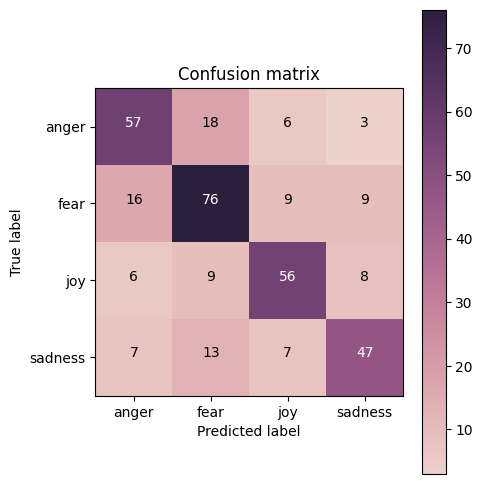

In [35]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
"""
About the accuracy
1. overfitting
The training accuracy reached 0.99, indicating that the decision tree model learned the training dataset very well. 
The decision tree model memorized almost all the patterns in the training dataset (high dimentinoal sparse matrix).
However, the testing accuracy is only 0.68, showing weak generalization.
This gap between training and testing results reveals that decision tree model actually encounters curse of dimensionality when trained by this kind of high dimentinoal sparse matrix.

About the classification_report among 4 emotions
I noticed that "fear" support has the largest number of samples (support = 110) but doesn't achieve better evaluation score.
This suggests that increasing data volume alone does not guarantee higher accuracy, 
especially when the feature representation is not semantically rich.
All emotions have similar F1-scores around 0.67 except 'joy' (0.71), which is the most accurately recognized emotion.
Among all classes, 
Joy got the highest recall around 0.71, which is the most accurately recognized emotion,
wheras anger shows the lowest recall (around 0.68), meaning the model often misclassifies anger-related texts as other negative emotions.

precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347

About the confusion matrix:
The diagonal entries represent correct predictions. (emotion is classified in accutate)
I observed that most values lie on the diagonal, meaning the model can roughly identify the correct emotion category.
However, frequent misclassifications occur between anger/fear and fear/sadness:
"anger"/ "fear" 
anger → fear 15 ;  fear → anger 12
The model tends to consider strong negative words(which should be "anger") to "fear".
Or the model confuses strongly negative expressions with fearful tones.

"fear" / "sadness"
sadness → fear 12 ; fear → sadness 17
Some words such as "cry", "scared", "alone"between "sadness" and  "fear" share semantically overlapping,
making model separation difficult.
This indicates that class imbalance is not the main issue.
Instead, the lack of semantic depth in bag-of-words features limits the model’s ability to generalize emotional nuance.

"joy"
joy -> anger 6; joy -> fear; joy-> sadness 10
"joy" shows fewer cross-errors with opposite-polarity emotions (anger, fear, sadness), 
so it achieves the highest recall.

Overall, the Decision Tree performs consistently but lacks semantic understanding.

act\pred
anger   57 15  3  9  |  84
fear    12 76  5 17  | 110
joy      6  7 56 10  |  79
sadness 10 12  4 48  |  74
---------------------------
        85 110 68 84 | 347
"""




'\nAbout the accuracy\n1. overfitting\nThe training accuracy reached 0.99, indicating that the decision tree model learned the training dataset very well. \nThe decision tree model memorized almost all the patterns in the training dataset (high dimentinoal sparse matrix).\nHowever, the testing accuracy is only 0.68, showing weak generalization.\nThis gap between training and testing results reveals that decision tree model actually encounters curse of dimensionality when trained by this kind of high dimentinoal sparse matrix.\n\nAbout the classification_report among 4 emotions\nI noticed that sadness support has the largest number of samples (support = 74) but doesn\'t achieve better evaluation score.\nThis suggests that increasing data volume alone does not guarantee higher accuracy, \nespecially when the feature representation is not semantically rich.\nAll emotions have similar F1-scores around 0.67 except \'joy\' (0.71), which is the most accurately recognized emotion.\nAmong all c

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



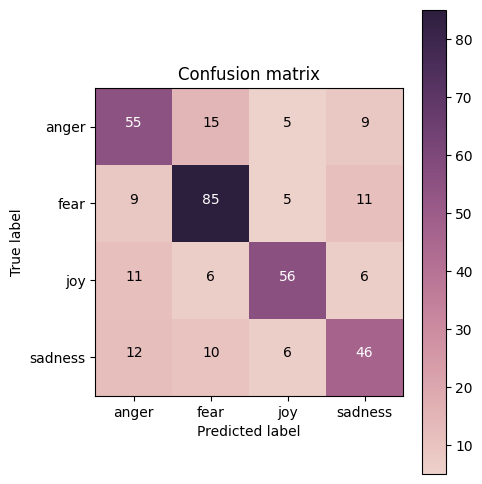

In [37]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

## get the pred result
y_test_pred[:10]

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

## check by confusion matrix
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_NB, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [96]:
# Answer here
"""
Decision Tree:
    training accuracy: 0.99
    testing accuracy: 0.68
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347

NB:
    training accuracy: 0.79
    testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347   

The Naive Bayes model achieved 0.79 training accuracy and 0.70 testing accuracy, showing a balanced performance with only minor overfitting.
In contrast, the Decision Tree model reached 0.99 training accuracy but only 0.68 testing accuracy, 
which indicates severe overfitting, which means the model memorized the training data instead of learning general patterns.

Although both models obtained similar testing accuracy around 0.7, NB classifier demonstrates better generalization ability on this sparse text dataset.
This difference mainly arises from how each algorithm handles high-dimensional sparse matrices.

Theoretically, NB treats every token as an independent feature that assumes that features (words/ tokens) are independent given the class label.
And NB also estimates its conditional probability given each emotion class.
It then combines these probabilities multiplicatively to decide the most likely label.
This probabilistic approach naturally smooths the impact of noisy or rare words and performs well even when features are sparse.

Decision Tree, on the other hand, treats each word feature as a splitting condition and recursively divides the dataset.
In a sparse matrix, many words appear in only a few samples, which leads the tree to make numerous meaningless splits.
As a result, the model becomes excessively deep and complex, fitting the training data perfectly but failing to generalize a classic case of the high-variance problem.

Therefore, Naive Bayes outperforms the Decision Tree in generalization because it is a simple, high-bias yet low-variance model, 
while Decision Tree is low-bias but high-variance, prone to overfitting in text classification tasks.

conclusion:
According to the bias–variance tradeoff, Naive Bayes is a high-bias but low-variance model,
while Decision Tree is low-bias but high-variance.
For text classification tasks, where features are sparse and independent,
Naive Bayes provides a better tradeoff between bias and variance, resulting in more stable and reliable performance on unseen data.
"""

'\nDecision Tree:\n    training accuracy: 0.99\n    testing accuracy: 0.68\n              precision    recall  f1-score   support\n\n       anger       0.66      0.68      0.67        84\n        fear       0.66      0.69      0.67       110\n         joy       0.72      0.71      0.71        79\n     sadness       0.70      0.64      0.67        74\n\n    accuracy                           0.68       347\n   macro avg       0.68      0.68      0.68       347\nweighted avg       0.68      0.68      0.68       347\n\nNB:\n    training accuracy: 0.79\n    testing accuracy: 0.7\n              precision    recall  f1-score   support\n\n       anger       0.63      0.65      0.64        84\n        fear       0.73      0.77      0.75       110\n         joy       0.78      0.71      0.74        79\n     sadness       0.64      0.62      0.63        74\n\n    accuracy                           0.70       347\n   macro avg       0.70      0.69      0.69       347\nweighted avg       0.70     

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [40]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [41]:
import keras

In [42]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [43]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2313      joy
1531     fear
17      anger
565     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [44]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [45]:
# I/O check
input_shape = X_train.shape[1] # X_train: (3613, 500)
print('input_shape: ', input_shape)


output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [46]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
# shape=(500,) 的逗號是為了告訴 Keras「這是一維 tuple」，每筆樣本是長度為500的一維向量
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
"""
    # Dense(units=64) → 新增一層全連接層，有 64 個神經元。
    # (X) 代表輸入是前一層的輸出
    # output shape = (None, 64)
"""
H1 = ReLU()(X_W1) # Rectified Linear Unit

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

""" 
    → 第1層學詞頻與情緒間的粗略關係，
    → 第2層再組合出複雜的模式（例如「出現happy + exclamation mark = joy」）。
""" 
# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4 neurons
H3 = Softmax()(H2_W3) # use softmax 把輸出轉成「機率分佈」

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [47]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3723 - loss: 1.3278 - val_accuracy: 0.4352 - val_loss: 1.2749
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6490 - loss: 0.9844 - val_accuracy: 0.6744 - val_loss: 0.9246
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7982 - loss: 0.5852 - val_accuracy: 0.6945 - val_loss: 0.7522
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8469 - loss: 0.4198 - val_accuracy: 0.6974 - val_loss: 0.7783
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8835 - loss: 0.3263 - val_accuracy: 0.6888 - val_loss: 0.8281
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9073 - loss: 0.2737 - val_accuracy: 0.6888 - val_loss: 0.8735
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9267 - loss: 0.2205 - val_accuracy: 0.6888 - val_loss: 0.9432
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9430 - loss: 0.1860 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [48]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

# model.predict(X_test) 得到的是 softmax 機率（每列四個機率加總≈1）。
# e.g. 第一列 [0.809, 0.172, 0.00021, 0.0189] → 預測為第 0 類（anger）。

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[6.0593586e-02, 5.9289414e-01, 7.1444660e-03, 3.3936778e-01],
       [3.5828114e-02, 7.5460225e-02, 8.8290370e-01, 5.8080177e-03],
       [6.1079212e-05, 9.6303022e-01, 2.7575978e-04, 3.6632996e-02],
       [3.1744561e-04, 4.2464943e-03, 1.3378119e-03, 9.9409831e-01],
       [2.0357504e-04, 3.8699308e-04, 9.8393941e-01, 1.5470057e-02]],
      dtype=float32)

In [49]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

# label_decode(label_encoder, pred_result)
# label_decode 內部用 argmax 先把機率 → 類別索引，再 inverse_transform 回原始字串標籤

array(['fear', 'joy', 'fear', 'sadness', 'joy'], dtype=object)

In [50]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
# y_test 是 one-hot，需要先 decode 才能和 pred_result（字串）比對。


testing accuracy: 0.65


In [51]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.372267,1.327812,0.435158,1.274901
1,1,0.649045,0.984393,0.674352,0.924624
2,2,0.798229,0.585195,0.694524,0.752207
3,3,0.846942,0.419751,0.697406,0.778290
4,4,0.883476,0.326334,0.688761,0.828118
5,5,0.907279,0.273729,0.688761,0.873499
6,6,0.926654,0.220481,0.688761,0.943210
7,7,0.942984,0.185952,0.680115,0.995563
8,8,0.953778,0.156269,0.680115,1.070328
9,9,0.955439,0.141529,0.677233,1.166957


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


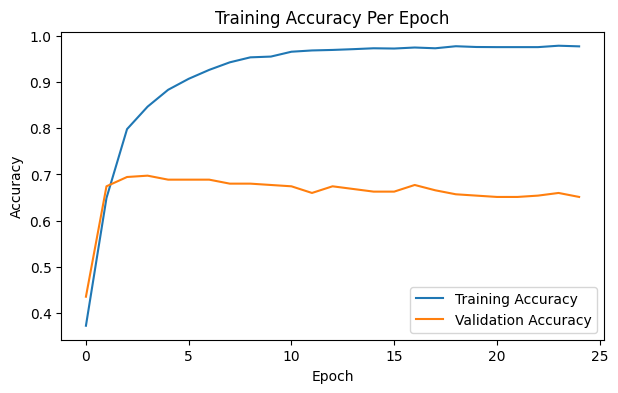

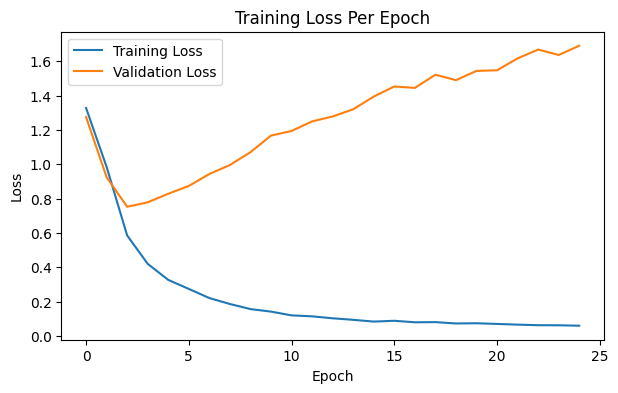

In [ ]:
# Answer here
import matplotlib.pyplot as plt

x = training_log['epoch']
train_acc = training_log['accuracy']
val_acc = training_log['val_accuracy']

# accuracy
plt.figure(figsize=(7,4))
plt.plot(x, train_acc, label='Training Accuracy')
plt.plot(x, val_acc, label='Validation Accuracy')
plt.title('Training Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(7,4))
plt.plot(x, training_log['loss'], label='Training Loss')
plt.plot(x, training_log['val_loss'], label='Validation Loss')
plt.title('Training Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

"""
## Observation& Insight
I observed that both the training accuracy and validation accuracy increase rapidly during the first 2 epochs.
After that, the training accuracy continues to rise and becomes stable at around 0.97;
However, the validation accuracy fluctuates around 0.7 without further improvement since the second epoch.

In contrast, the training loss steadily decreases until around the 10th epoch and then flattens out,
whereas the validation loss drops only during the first two epochs and starts increasing afterwards.

This pattern clearly indicates that the model is overfitting. 
The model keeps improving on the training data (memorize training samples instead of learning the underlying patterns) 
but fails to generalize to unseen validation data.

Relation to Overfitting / Underfitting Concepts
If both training and validation accuracies were low and loss values remained high,
that would suggest underfitting, meaning the model is too simple or not trained enough.
However, in this case, training performance keeps improving while validation performance stagnates or worsens,
which matches the definition of overfitting — the model has low bias but very high variance.

Thus, to improve generalization, techniques such as early stopping, dropout, or L2 regularization could be applied.


"""



---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [53]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2313,30309,Finn singing 'Can't Fight This Feeling' in the...,"[Finn, singing, 'Ca, n't, Fight, This, Feeling..."
1531,20674,@BlairWitchMovie love new movie\n #BlairWitch ...,"[@, BlairWitchMovie, love, new, movie\n, #, Bl..."
17,10017,"I hate my lawn mower. If it had a soul, I'd co...","[I, hate, my, lawn, mower, ., If, it, had, a, ..."
565,10565,@SlaveGuinevere its more of a little prick tha...,"[@, SlaveGuinevere, its, more, of, a, little, ..."
67,10067,Once again the only thing on my feed is naay r...,"[Once, again, the, only, thing, on, my, feed, ..."


In [54]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Finn', 'singing', "'Ca", "n't", 'Fight', 'This', 'Feeling', "'", 'in', 'the', 'shower', 'and', 'Will', 'spying', 'on', 'him', 'is', 'one', 'of', 'the', 'best', 'scenes', 'on', 'any', 'show', '.']),
       list(['@', 'BlairWitchMovie', 'love', 'new', 'movie\\n', '#', 'BlairWitch', '#', 'blairwitchproject', '#', 'HorrorMovies']),
       list(['I', 'hate', 'my', 'lawn', 'mower', '.', 'If', 'it', 'had', 'a', 'soul', ',', 'I', "'d", 'condemn', 'it', 'to', 'the', 'fiery', 'pits', 'of', 'Hell', '.'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [55]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [56]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.4833711 ,  0.36475962, -0.02948475, -0.34187582, -0.33443567,
       -0.73392946,  0.42188105,  1.3672438 , -0.27126017, -0.5217653 ,
       -0.2725043 , -0.63977957, -0.54736227,  0.34811512, -0.31503865,
       -0.2837409 ,  0.46787673, -0.57910544, -0.14558926, -1.0725226 ,
        0.6623666 ,  0.6444363 ,  0.20683762,  0.20011893,  0.12618215,
        0.09931791, -0.43275312,  0.4547712 , -0.548811  ,  0.26342452,
        0.04580715,  0.02005536,  0.27059403, -1.116637  , -0.24537125,
        0.5016212 ,  0.26013157, -0.06119798, -0.4629309 , -0.3934061 ,
        0.02742006, -0.12830365, -0.37486592,  0.26561612,  0.73736674,
       -0.10306238, -0.783489  ,  0.41594177,  0.7940448 ,  0.7100838 ,
        0.18017761, -0.71398145,  0.08709306, -0.20308563, -0.46414787,
       -0.00220568,  0.33083868, -0.29210213,  0.14983195,  0.664016  ,
       -0.03266861, -0.60523236,  0.7627739 ,  0.6212392 , -0.5202309 ,
        0.8636501 ,  0.30916032,  1.0031414 , -0.99173903,  0.20

In [57]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('cats', 0.9212614893913269),
 ('help', 0.9150459170341492),
 ('birthday', 0.912318229675293),
 ('O', 0.9104834198951721),
 ('blessed', 0.9030789732933044),
 ('free', 0.9011251926422119),
 ('Be', 0.9002900123596191),
 ("'you", 0.8994636535644531),
 ('blessing', 0.895412266254425),
 ('bday', 0.890620768070221)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [58]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [59]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [60]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411403656006)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
"""
In order to use word vectors for sentence-level data,
we need to convert a sequence of word embeddings into a single fixed-size vector that represents the whole sentence.

One simple and common way is to take the average of all word vectors in the sentence.
This means that each word contributes equally to the final sentence representation.
It works quite well for short texts, such as tweets or emotion classification tasks.

Another approach is to use a weighted average with TF-IDF scores,
so that important words (like “happy”, “angry”) get higher weights,
while common words (like “the”, “is”) have less influence.

After converting each sentence into a fixed-length vector,
these vectors can be used as input features for machine learning models such as Naive Bayes, SVM, or deep neural networks.

For more advanced methods, the sequence of word embeddings can also be fed into models like RNNs or Transformers,
which are able to capture word order and contextual relationships between words.
But for this lab, using the average word vector per sentence is usually enough to represent the sentence meaning.
"""

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [62]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [63]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](./pics/pic6.png)

In [64]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [65]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [93]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

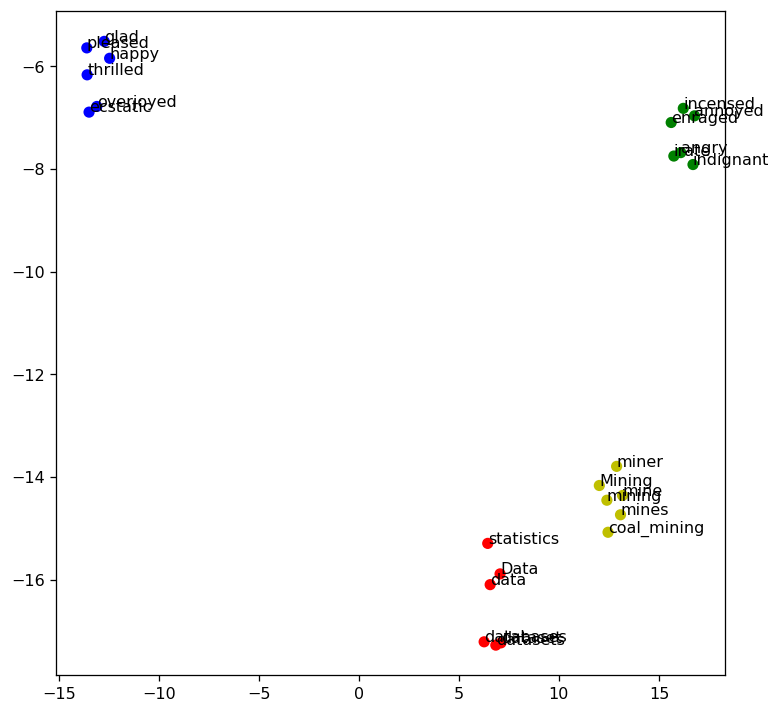

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

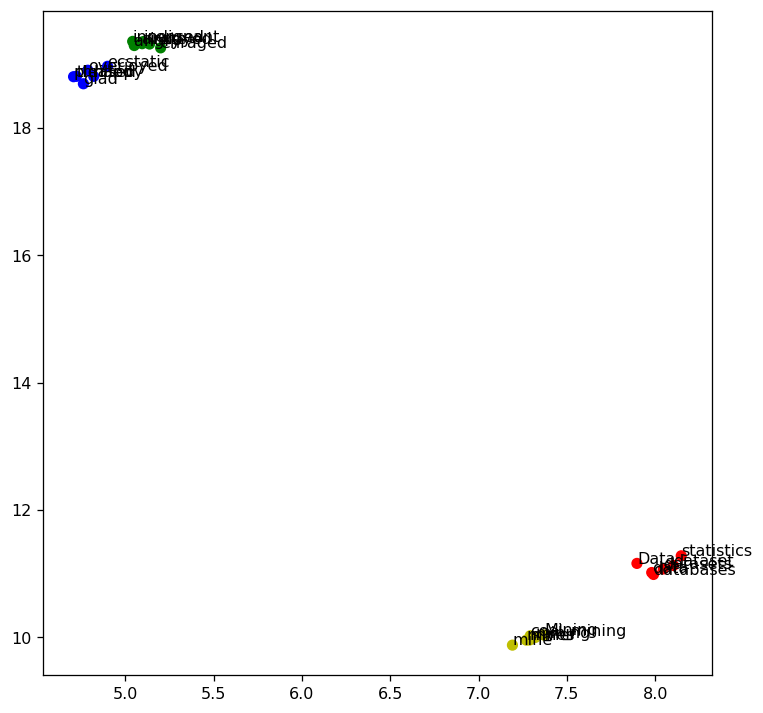

In [95]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Collected words: 60


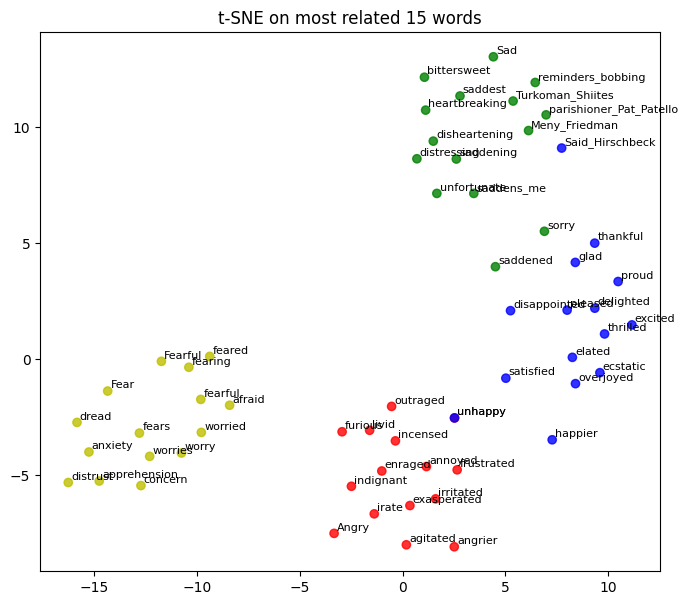

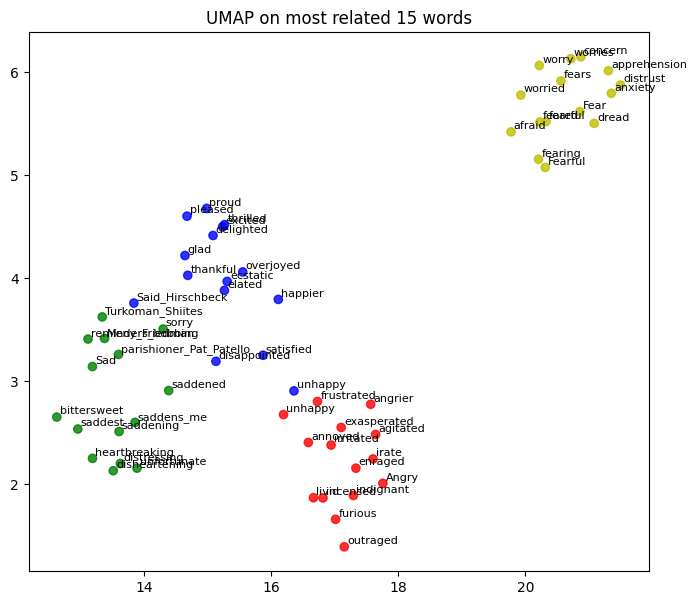

In [ ]:
# Answer here
import numpy as np
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

seeds= ["angry", "happy", "sad", "fear"]
topn = 15  
model = w2v_google_model 
target_words = []
labels = []
colors = []
color = {
    "angry": "r",
    "happy": "b",
    "sad": "g",
    "fear": "y",
}

for s in seeds:
    # 取相似詞清單
    similar = [w for w, _ in model.most_similar(s, topn=topn)]
    # mask 過濾模型中確實存在的詞（ key_to_index ）
    valid = [w for w in similar if w in model.key_to_index]
    # 追加到列表（允許跨群重複）
    target_words.extend(valid)
    labels.extend([s] * len(valid))
    colors.extend([color[s]] * len(valid))

print("Collected words:", len(target_words))

# 取向量
valid_vectors = [model.get_vector(w) for w in target_words]
X = np.array(valid_vectors, dtype=np.float32)

# t-SNE 
tsne = TSNE(
    n_components=2,
    metric="cosine",
    init="pca",          
    perplexity=15,       # 10~30 
    learning_rate="auto",
    random_state=42,
)
X_tsne = tsne.fit_transform(X)

# UMAP
umap_model = umap.UMAP(
    n_components=2,
    metric='cosine',
    n_neighbors=15,      # n_neighbors小:注重局部 ; n_neighbors大:越看整體
    min_dist=0.1,        # 越小cluster密
    random_state=42
)
X_umap = umap_model.fit_transform(X)

# 畫圖
def plot_scatter(X2, words, labels, colors, title):
    plt.figure(figsize=(8, 7))
    plt.scatter(X2[:,0], X2[:,1], c=colors, alpha=0.8)
    for w,(x,y) in zip(words, X2):
        plt.annotate(w, (x,y),textcoords="offset points", xytext=(2,2), fontsize=8)
    plt.title(title)
    plt.show()

plot_scatter(X_tsne,  target_words, labels, colors, "t-SNE on most related 15 words")
plot_scatter(X_umap,  target_words, labels, colors, "UMAP on most related 15 words")

"""
1. Observations
t-SNE
	The four emotion groups (angry ='r', happy = 'b', sad = 'g', fear = 'y') are clearly separated into distinct “islands.”
	Each cluster is compact internally, but the distance between clusters is very large.
	This shows that t-SNE emphasizes local similarity, grouping semantically close words tightly but ignoring the true global relationships between groups.
UMAP
	The four emotion clusters are still distinguishable, but they are more continuous and connected.
	The overall structure appears smoother, and there are gradual transitions between emotional groups.
	This demonstrates that UMAP preserves both local and global structures, maintaining a more realistic semantic topology.

2. Interpretation
t-SNE
    Non-linear dimensionality reduction focusing on pairwise local probability distributions
    Produces clear, well-separated small clusters, but inter-cluster distances are not meaningful
    Emphasizes local manifold learning
UMAP
    Based on manifold and graph theory; balances local and global relationships
    Creates smoother transitions and preserves global geometry
    Integrates local + global preservation

3. Relation to Overfitting / Underfitting
When t-SNE separates clusters too aggressively, it behaves like overfitting—focusing excessively on local details.
When UMAP shows overly blended clusters (e.g., if n_neighbors is too large), it acts like underfitting—losing fine-grained distinctions.
This reflects the trade-off between bias & variance:
	t-SNE: lower bias, higher variance (sensitive to local variations)
	UMAP: higher bias, lower variance (stable but smoother view)

4. Concl.
In summary, t-SNE produces sharper, isolated clusters that highlight fine-grained local relationships,
while UMAP provides a more balanced, globally coherent map of word semantics.
Therefore, UMAP is generally better for understanding the overall structure of embeddings,
whereas t-SNE is useful for visualizing detailed local neighborhoods.
"""

---